### IMPORTING LIBRARIES FOR EDA



In [1]:
#loading basic libraries for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### LOADING DATASET AND BASIC INFO 


In [2]:
#Loading dataset in the environment
data= pd.read_csv("Insurance_Dataset.csv")

In [3]:
#Shape of data is 1048575 entries and 24 columns
data.shape   

(1048575, 24)

In [ ]:
#column names 
for i,j in enumerate(data.columns):
  print(i,j, sep="\t",end="\n")

0	Area_Service
1	Hospital County
2	Hospital Id
3	Age
4	Gender
5	Cultural_group
6	ethnicity
7	Days_spend_hsptl
8	Admission_type
9	Home or self care,
10	ccs_diagnosis_code
11	ccs_procedure_code
12	apr_drg_description
13	Code_illness
14	Mortality risk
15	Surg_Description
16	Weight_baby
17	Abortion
18	Emergency dept_yes/No
19	Tot_charg
20	Tot_cost
21	ratio_of_total_costs_to_total_charges
22	Result
23	Payment_Typology


In [ ]:
for i,j in enumerate(data.columns):
  print(i,j)


0 Area_Service
1 Hospital County
2 Hospital Id
3 Age
4 Gender
5 Cultural_group
6 ethnicity
7 Days_spend_hsptl
8 Admission_type
9 Home or self care,
10 ccs_diagnosis_code
11 ccs_procedure_code
12 apr_drg_description
13 Code_illness
14 Mortality risk
15 Surg_Description
16 Weight_baby
17 Abortion
18 Emergency dept_yes/No
19 Tot_charg
20 Tot_cost
21 ratio_of_total_costs_to_total_charges
22 Result
23 Payment_Typology


In [ ]:
data.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104

In [ ]:
data.dtypes.value_counts()

object     13
int64       6
float64     5
dtype: int64

###MAKING COPY OF ORG DATA 


In [ ]:
#making copy of orginal dataframe
data1=data.copy().reset_index(drop=True)

In [ ]:
data1.head()

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


###DUPLICATES HANDLING


In [ ]:
#data set is huge checking for duplicates 
#Count of Duplicate entries
data1[data1.duplicated()].shape[0]
dup=data1[data1.duplicated()].shape[0]/data1.shape[0]*100
print("%of duplicate entries:",round(dup,3)) ##4814 entries

%of duplicate entries: 0.459


In [ ]:
#Droping duplicates from the data
data1.drop_duplicates(inplace=True)
 


In [ ]:
data1.reset_index(inplace=True,drop=True)


In [ ]:
#New data after removing duplicates
data1.shape

(1043761, 24)

###RENAMING COLUMNS

In [ ]:
#renaming some columns for ease of operation
data1 = data1.rename({'Hospital County': 'Hosp_County', 'Hospital Id':'Hosp_Id','Cultural_group':"Cultural_Group"}, axis=1)
data1=data1.rename({'ethnicity':'Ethnicity','Days_spend_hsptl':'Days_Spend_Hosp', 'Admission_type':'Admit_Type' },axis=1)
data1=data1.rename({'Home or self care,':'Home_Or_Selfcare','Code_illness':'Code_Illness', 'Mortality risk':'Mortality_Risk' },axis=1)
data1=data1.rename({'Emergency dept_yes/No':'Emergency_Dept'},axis=1)

In [ ]:
data1.head()

,Area_Service,Hosp_County,Hosp_Id,Age,Gender,Cultural_Group,Ethnicity,Days_Spend_Hosp,Admit_Type,Home_Or_Selfcare,ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_Illness,Mortality_Risk,Surg_Description,Weight_baby,Abortion,Emergency_Dept,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1


###TARGET VARIABLE DESCRIPTIVE ANALYSIS


In [ ]:
#Data target variable counts in Result column
#0 -Fraudulent
#1 - Genuine
for i,j in enumerate(data1.Result.value_counts()):
  print(i,j,sep="\t",end="\n") ##1-786407 0-262168

0	786407
1	262168


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


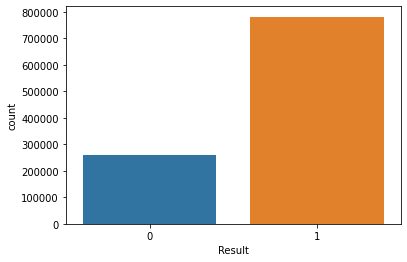

In [ ]:
#Visualization of Fraudulwnt and genuine claims
sns.countplot("Result",data=data1)
plt.show()

###MISSING VALUES/NULL VALUES ANALYSIS 

In [ ]:
#Null Values
e=0
for i,j in enumerate(data1.isnull().sum()):
  if(j>0):
    print(data.iloc[:,i].name,j,sep="\t",end="\n")
    e=e+j
    print("In Percentage:",round(j/data.shape[0],3)*100)
print("Total Null Entries:",e)




Area_Service	2456
In Percentage: 0.2
Hospital County	2456
In Percentage: 0.2
Hospital Id	2456
In Percentage: 0.2
Mortality risk	42
In Percentage: 0.0
Total Null Entries: 7410


In [ ]:
print("% missing values:",(data["Hospital County"].isnull().sum())/data["Hospital County"].shape[0]*100)

% missing values: 0.23422263548148678


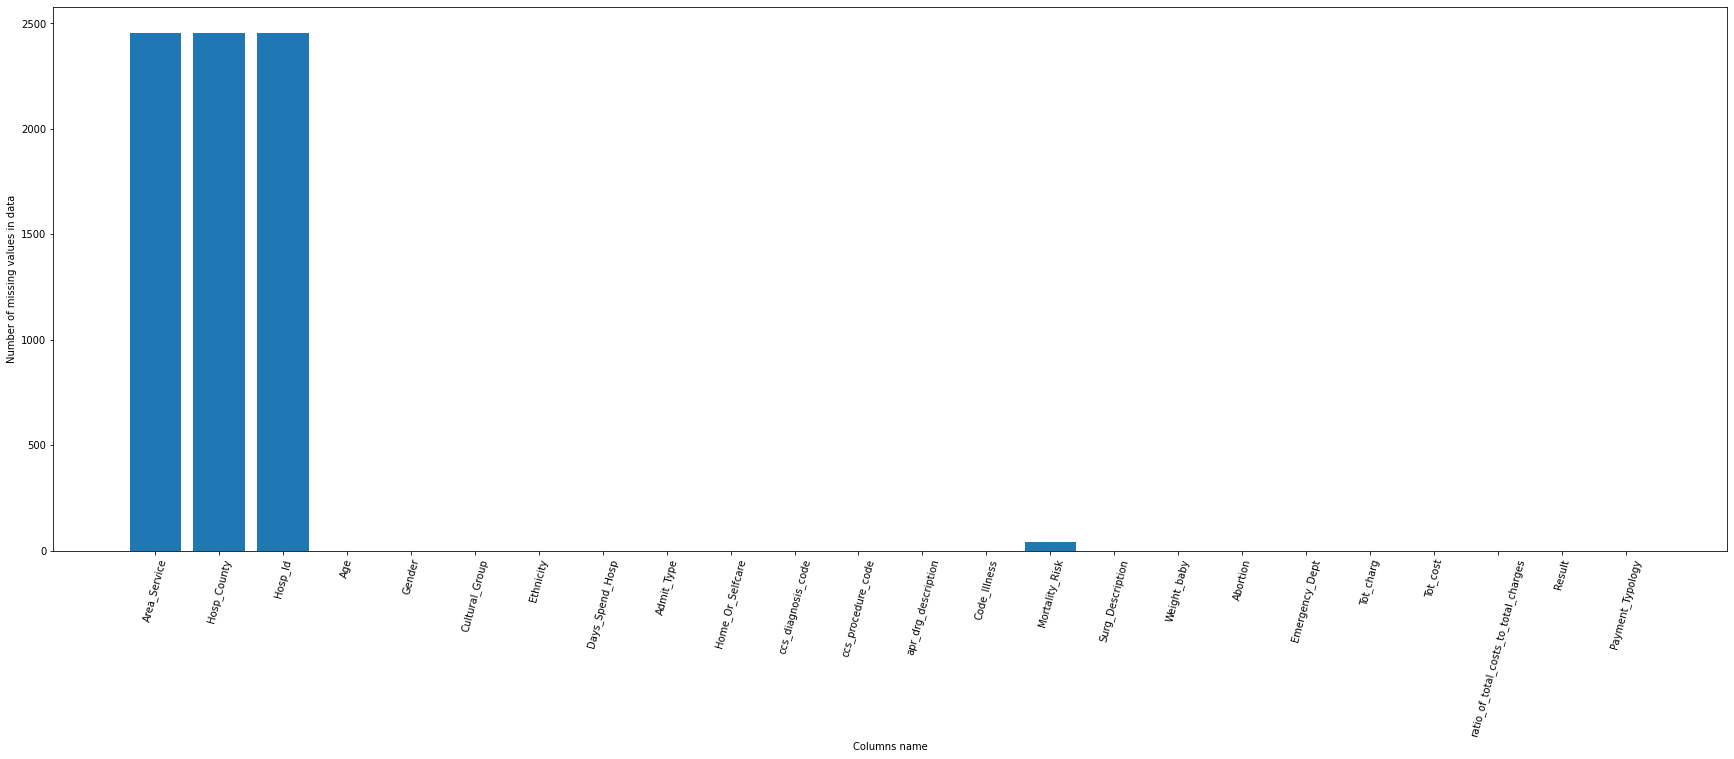

In [ ]:
#Visualization of missing values
plt.figure(figsize = (30,10))
plt.bar(data1.columns, data1.isnull().sum())
plt.xlabel("Columns name")
plt.xticks(rotation=75)
plt.ylabel("Number of missing values in data")
plt.show()

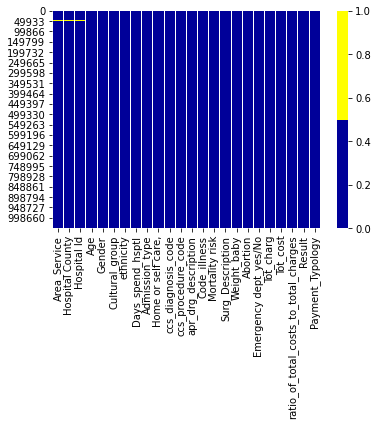

In [ ]:
#Null values display for orginal data 
cols =data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colours))

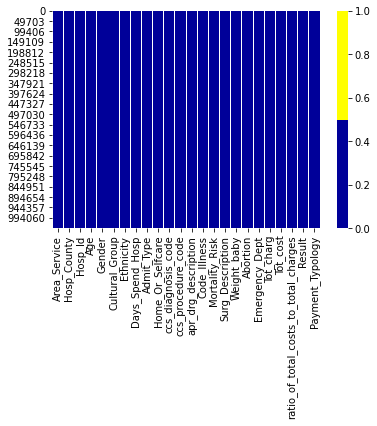

In [ ]:
#Null values display for duplicates removed  data 
cols =data1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours))

###PARAMETERS DESCRIPTIVE ANALYSIS

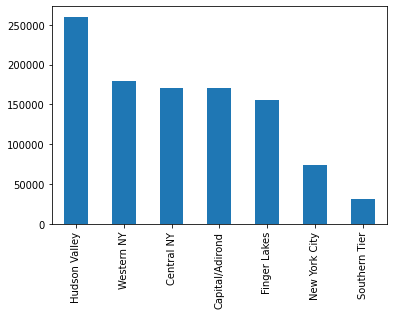

In [ ]:
#Bar plot
data1['Area_Service'].value_counts().plot.bar()

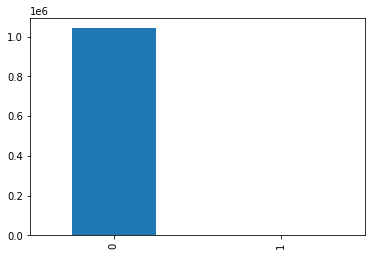

In [ ]:
data1.Area_Service.isnull().astype("int64").value_counts().plot.bar()
# 0 - not missing values
# 1- missing values

In [ ]:
data1=data.drop_duplicates().reset_index(drop=True)
data1[data1.Area_Service.isnull()=="True"].Area_Service=data1.Area_Service.mode()
    

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


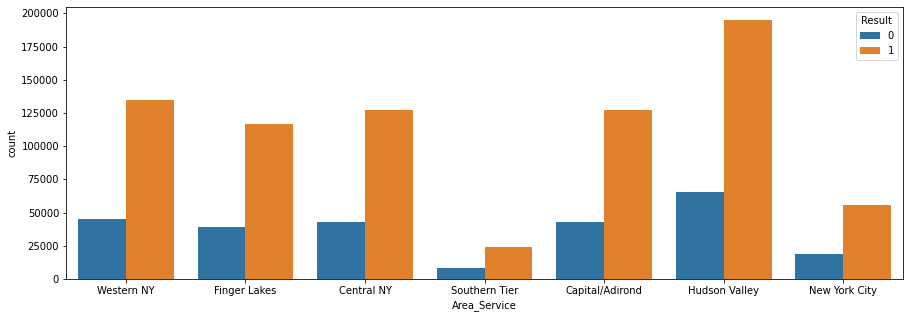

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("Area_Service",hue="Result",data=data.drop_duplicates())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


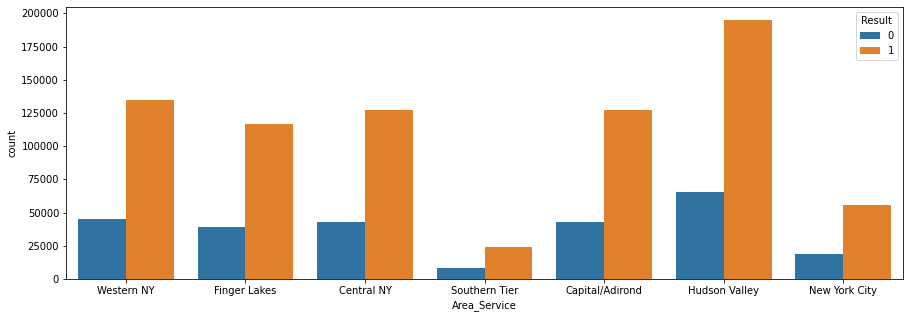

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("Area_Service",hue="Result",data=data1)

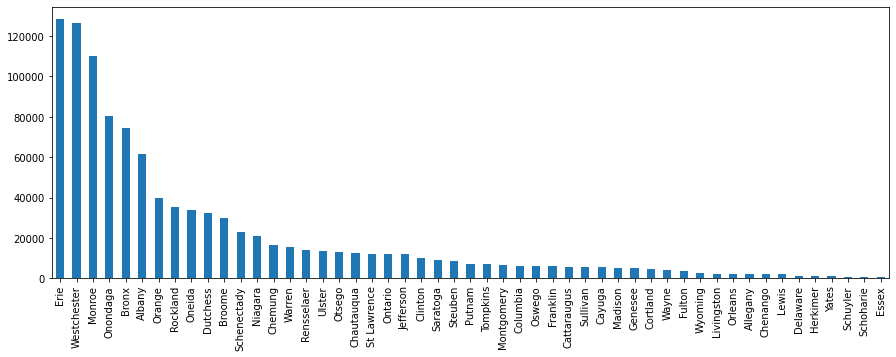

In [ ]:
plt.figure(figsize=(15,5))
data1["Hosp_County"].value_counts().plot.bar() # 

In [ ]:
data1.Hosp_County.unique().shape[0] #total 51 

52

In [ ]:
data1["Hosp_Id"].unique().shape[0]  # 143 we can drop it as it is just reference no.

144

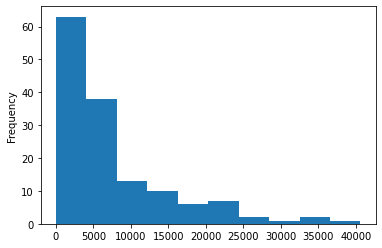

In [ ]:
data1["Hosp_Id"].value_counts().plot.hist()

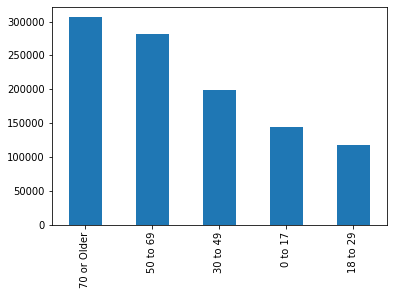

In [ ]:
data["Age"].value_counts().plot.bar() ##5 categories
#70 or Older    306017
#50 to 69       282013
#30 to 49       198827
#0 to 17        144607
#18 to 29       11711

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


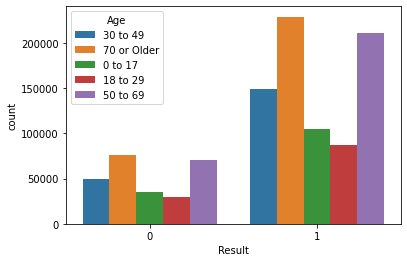

In [ ]:
#Visualizing the Fraudulent or Genuine claims
sns.countplot('Result', hue="Age" ,data = data1)
plt.show()

In [ ]:
data1["Gender"].value_counts() 
#F    593506
#M    455019
#U        50

F    590556
M    453155
U        50
Name: Gender, dtype: int64

In [ ]:
data1[data1["Gender"]=="U"] # 50 entries 

In [ ]:
data1[data1["Gender"]=="U"].isnull().sum()  #### 23 entries having null values

Area_Service                             23
Hosp_County                              23
Hosp_Id                                  23
Age                                       0
Gender                                    0
Cultural_Group                            0
Ethnicity                                 0
Days_Spend_Hosp                           0
Admit_Type                                0
Home_Or_Selfcare                          0
ccs_diagnosis_code                        0
ccs_procedure_code                        0
apr_drg_description                       0
Code_Illness                              0
Mortality_Risk                            0
Surg_Description                          0
Weight_baby                               0
Abortion                                  0
Emergency_Dept                            0
Tot_charg                                 0
Tot_cost                                  0
ratio_of_total_costs_to_total_charges     0
Result                          

In [ ]:
(data1[data1["Gender"]=="U"].Weight_baby>0).sum()

43

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


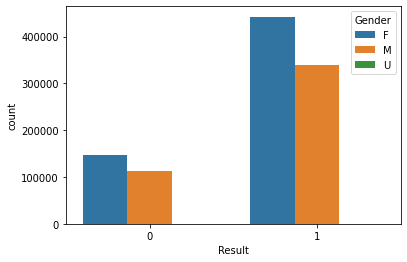

In [ ]:
#Visualizing the Fraudulent or Genuine claims
sns.countplot('Result', hue="Gender" ,data = data1)
plt.show()

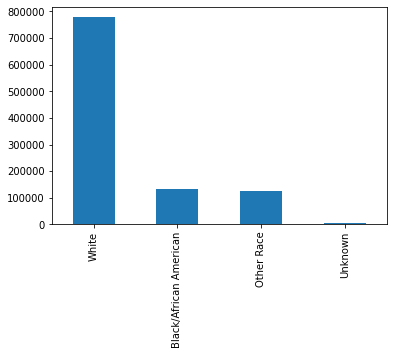

In [ ]:
 data1.Cultural_Group.value_counts().plot.bar() # 4 categories

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


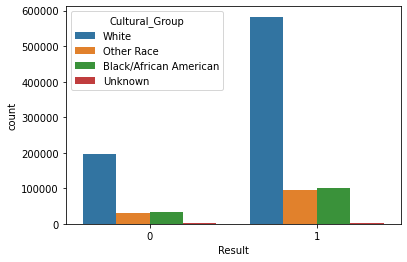

In [ ]:
#Visualizing the Fraudulent or Genuine claims
sns.countplot('Result', hue="Cultural_Group" ,data = data1)
plt.show()

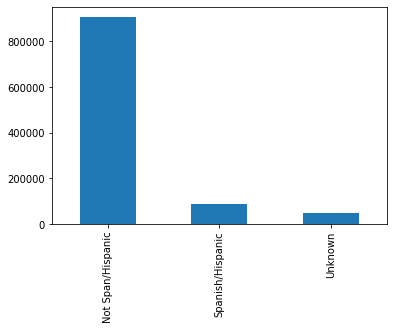

In [ ]:
data1["Ethnicity"].value_counts().plot.bar()
#Not Span/Hispanic    906388
#Spanish/Hispanic      87582
#Unknown               49791

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


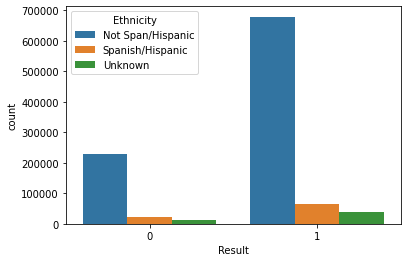

In [ ]:
sns.countplot("Result",hue="Ethnicity",data=data1)

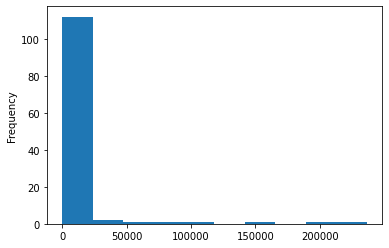

In [ ]:
data1.iloc[:,7].value_counts().plot.hist()

In [ ]:
"%s"%np.random.randint(121,150)

'137'

In [ ]:
data1[data1.iloc[:,7]=="120 +"].shape[0]

765

In [ ]:
data1[data1["Days_Spend_Hosp"]=="120 +"]

In [ ]:
for i in range(len(data1)):
  if(data1["Days_Spend_Hosp"][i]=="120 +"):
    data1["Days_Spend_Hosp"][i]="%s"%np.random.randint(121,150)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data1["Days_Spend_Hosp"]=data1["Days_Spend_Hosp"].astype(int)

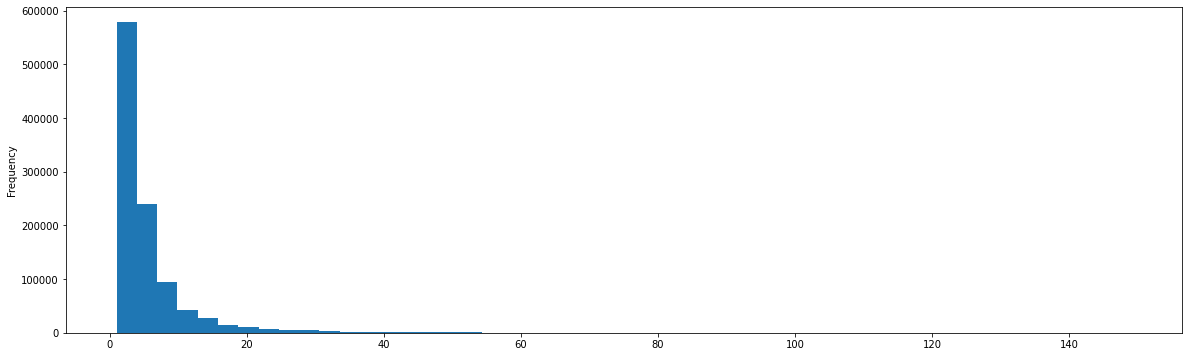

In [ ]:
plt.figure(figsize=(20,6))
data1["Days_Spend_Hosp"].plot.hist(bins=50)
#negatively skewed data

In [ ]:
print(data1["Days_Spend_Hosp"].corr(data1["Result"]))


-0.0006691423640615994


In [ ]:
data.corr()

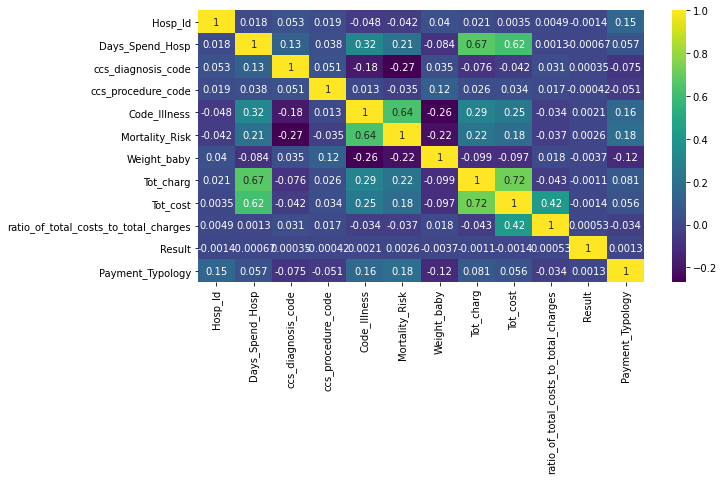

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data1.corr(), annot=True, cmap= 'viridis')

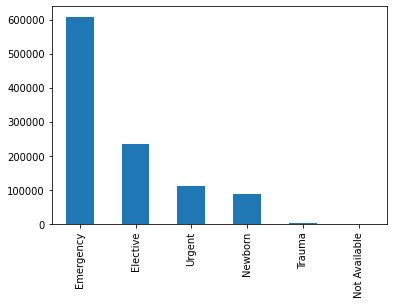

In [ ]:
data1.iloc[:,8].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


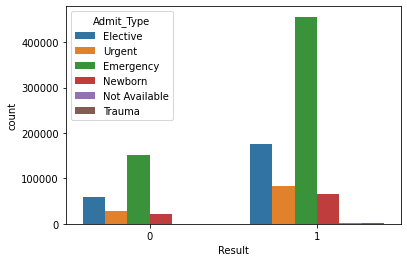

In [ ]:
sns.countplot("Result",hue="Admit_Type", data=data1)

In [ ]:
data1.columns

Index(['Area_Service', 'Hosp_County', 'Hosp_Id', 'Age', 'Gender',
       'Cultural_Group', 'Ethnicity', 'Days_Spend_Hosp', 'Admit_Type',
       'Home_Or_Selfcare', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_Illness', 'Mortality_Risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency_Dept',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

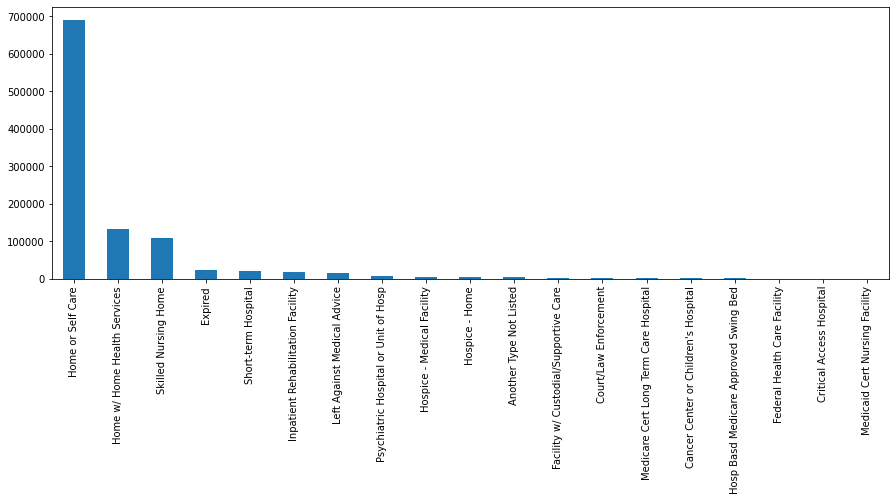

In [ ]:
plt.figure(figsize=(15,5))
data1['Home_Or_Selfcare'].value_counts().plot.bar()

In [ ]:
data1['Home_Or_Selfcare'].unique().shape[0]

19

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


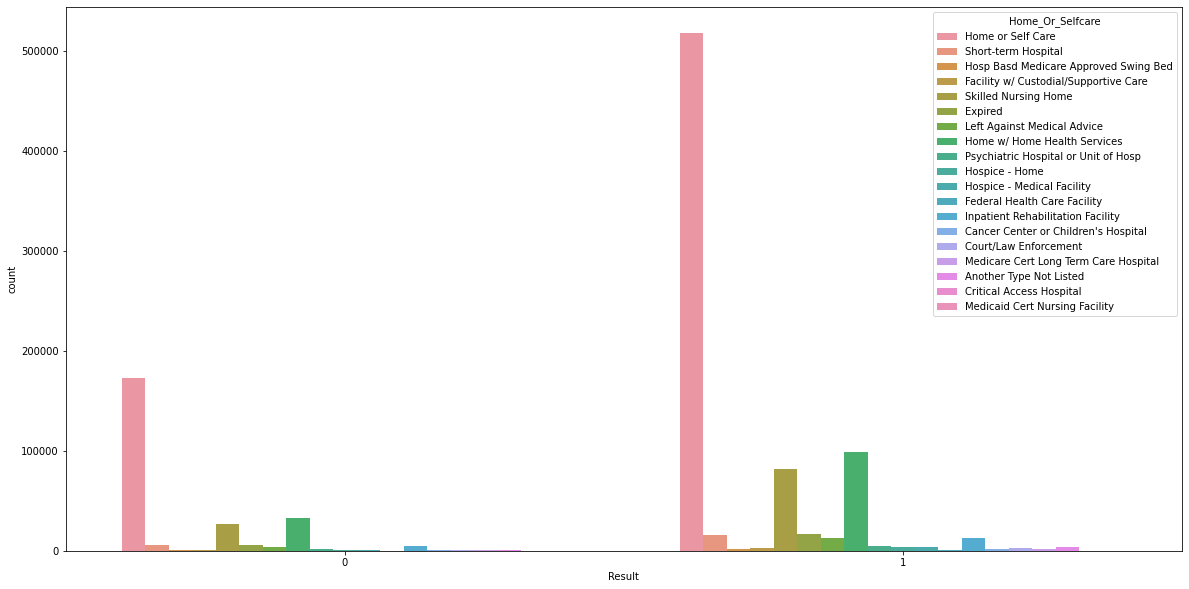

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot("Result",hue="Home_Or_Selfcare",data=data1)


In [ ]:
data["ccs_diagnosis_code"].describe().astype("int64")

count    1048575
mean         198
std          165
min            1
25%          108
50%          159
75%          218
max          670
Name: ccs_diagnosis_code, dtype: int64

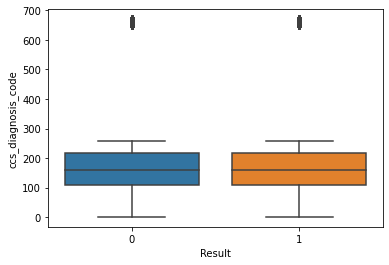

In [ ]:
sns.boxplot(x="Result", y="ccs_diagnosis_code", data=data1)

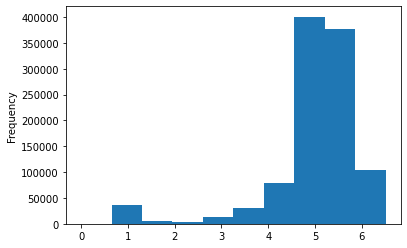

In [ ]:
np.log(data["ccs_diagnosis_code"]).plot.hist() ###positively skewed data

In [ ]:
data1['ccs_procedure_code'].describe().astype('int64')

count    1043761
mean          97
std           87
min            0
25%            0
50%           88
75%          172
max          231
Name: ccs_procedure_code, dtype: int64

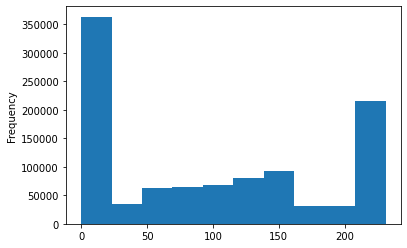

In [ ]:
(data1['ccs_procedure_code']).plot.hist()

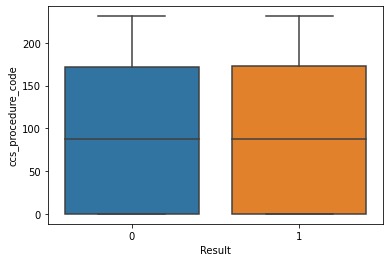

In [ ]:
sns.boxplot(x="Result", y='ccs_procedure_code', data=data1)

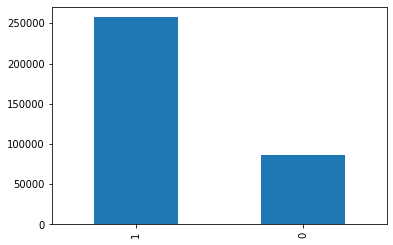

In [ ]:
data1[data1["ccs_procedure_code"]==0]["Result"].value_counts().plot.bar()

In [ ]:
data1.columns

Index(['Area_Service', 'Hosp_County', 'Hosp_Id', 'Age', 'Gender',
       'Cultural_Group', 'Ethnicity', 'Days_Spend_Hosp', 'Admit_Type',
       'Home_Or_Selfcare', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_Illness', 'Mortality_Risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency_Dept',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [ ]:
data1["apr_drg_description"].unique().shape[0]

316

In [ ]:
data1['Code_Illness'].unique()

array([1, 3, 2, 4, 0])

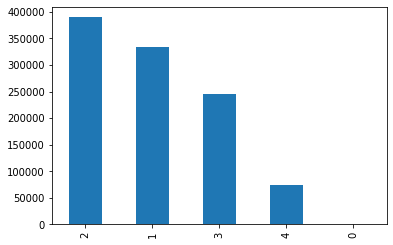

In [ ]:
data1['Code_Illness'].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


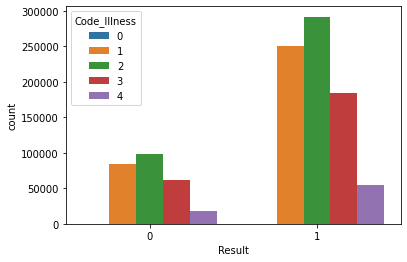

In [ ]:
sns.countplot("Result", hue="Code_Illness",data=data1)

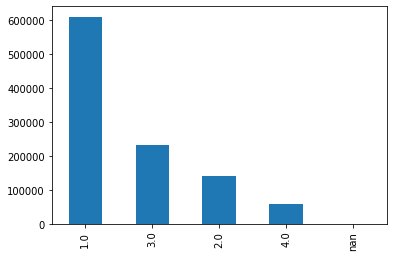

In [ ]:
data1["Mortality_Risk"].value_counts(dropna=False).plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


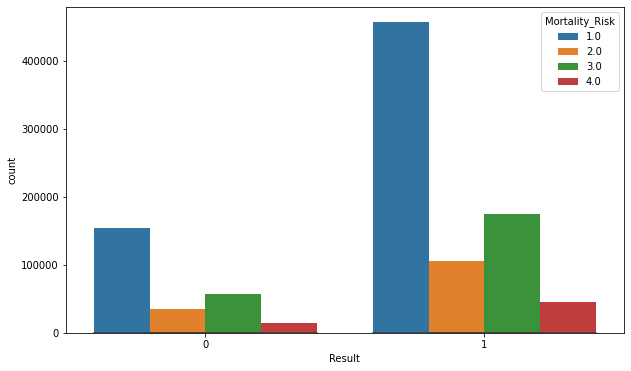

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Result",y="Mortality_Risk",data=data1)
sns.countplot("Result",hue="Mortality_Risk", data=data1)

In [ ]:
data1.columns

Index(['Area_Service', 'Hosp_County', 'Hosp_Id', 'Age', 'Gender',
       'Cultural_Group', 'Ethnicity', 'Days_Spend_Hosp', 'Admit_Type',
       'Home_Or_Selfcare', 'ccs_diagnosis_code', 'ccs_procedure_code',
       'apr_drg_description', 'Code_Illness', 'Mortality_Risk',
       'Surg_Description', 'Weight_baby', 'Abortion', 'Emergency_Dept',
       'Tot_charg', 'Tot_cost', 'ratio_of_total_costs_to_total_charges',
       'Result', 'Payment_Typology'],
      dtype='object')

In [ ]:
data1["Surg_Description"].unique()

array(['Medical', 'Surgical', 'Not Applicable'], dtype=object)

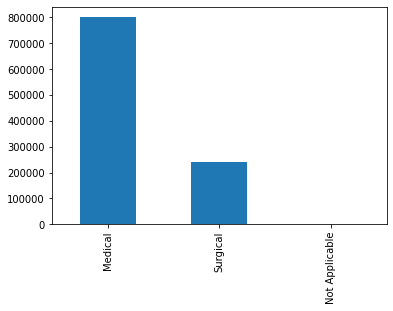

In [ ]:
data1["Surg_Description"].value_counts().plot.bar()

In [ ]:
d1=data1[data1["Surg_Description"]=="Not Applicable"]
d1.shape[0]

41

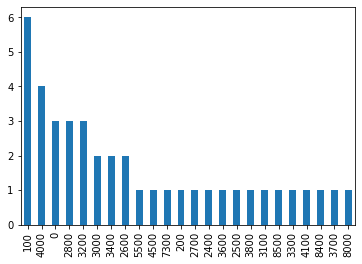

In [ ]:
d1.Weight_baby.value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


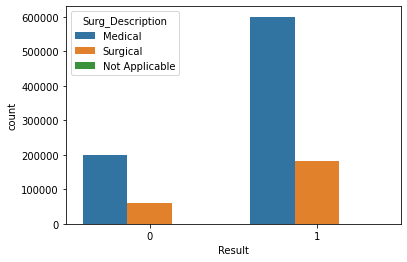

In [ ]:
sns.countplot("Result",hue="Surg_Description", data=data1)

In [ ]:
data1[data1["Weight_baby"]>0]["Weight_baby"].describe().astype('int64')

count    90761
mean      3243
std        624
min        100
25%       2900
50%       3300
75%       3600
max       9000
Name: Weight_baby, dtype: int64

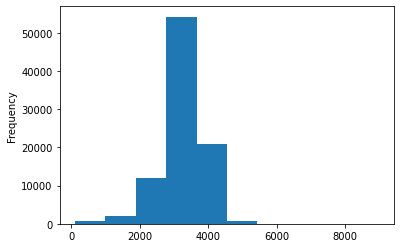

In [ ]:
data1[data1["Weight_baby"]>0]["Weight_baby"].plot.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    80
0    30
Name: Result, dtype: int64

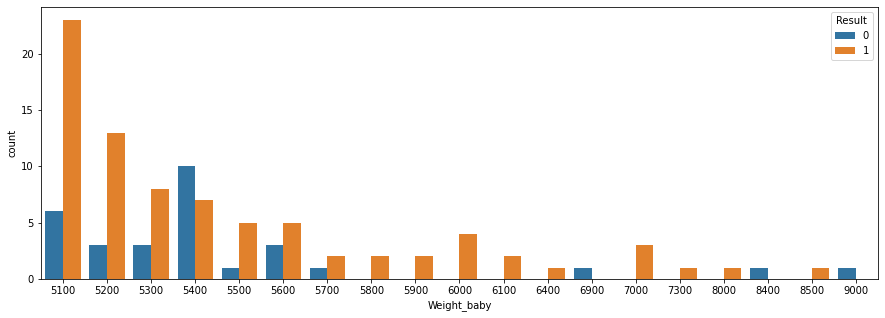

In [ ]:
d2=data1[data1["Weight_baby"]>5000]
plt.figure(figsize=(15,5))
sns.countplot("Weight_baby",hue="Result",data=d2)
d2["Result"].value_counts()

In [ ]:
data1["Abortion"].value_counts()

N    1042297
Y       1464
Name: Abortion, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


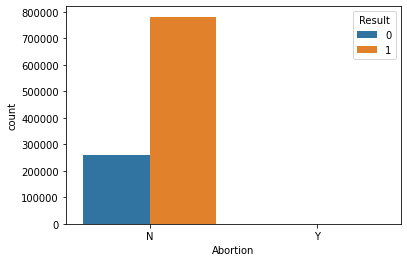

In [ ]:
sns.countplot("Abortion",hue="Result",data=data1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


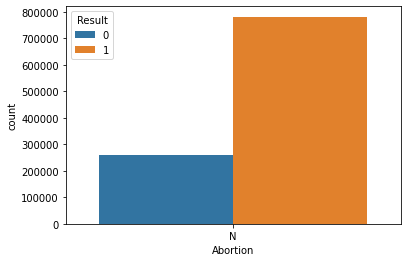

In [ ]:
d3=data1[data1['Abortion']=="N"]
d4=d3[d3["Weight_baby"]<5000]
sns.countplot("Abortion",hue="Result",data=d4)

In [ ]:
#https://www.health.ny.gov/statistics/sparcs/sysdoc/appp.htm
data1['Payment_Typology'].unique()

array([1, 2, 3, 4, 5])

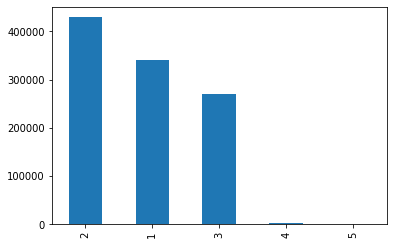

In [ ]:
data1['Payment_Typology'].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


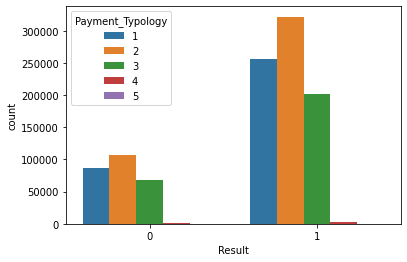

In [ ]:
sns.countplot("Result",hue="Payment_Typology",data=data1)

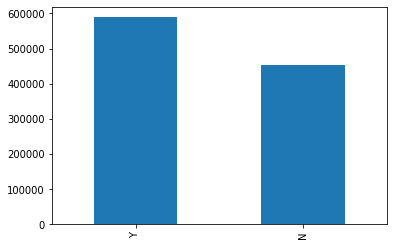

In [ ]:
data1['Emergency_Dept'].value_counts().plot.bar()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


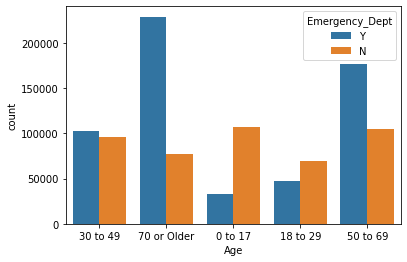

In [ ]:
sns.countplot("Age",hue="Emergency_Dept",data=data1)

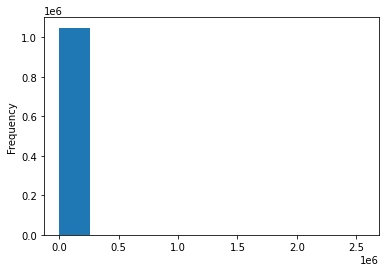

In [ ]:

data1.iloc[:,20].plot.hist()

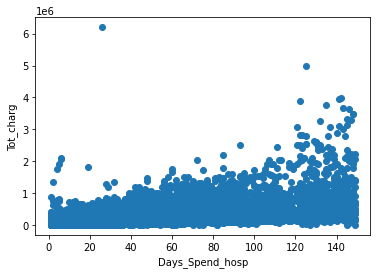

In [ ]:
#  'Tot_charg', 'To_cost'
plt.xlabel("Days_Spend_hosp")
plt.ylabel("Tot_charg")
plt.scatter(data1['Days_Spend_Hosp'],data1['Tot_charg'])


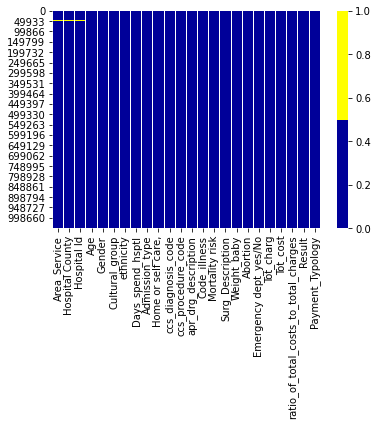

In [ ]:
  cols =data.columns 
  colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
  sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colours))

In [ ]:
try:
  def funct():
    print("Hello")
except Keyerror:
  print("wrong funct")
      






# AUTO EDA PROCESS


In [ ]:
from tqdm import tqdm 
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm 
import warnings
warnings.filterwarnings("ignore")
class Complete_eda:
  def __init__(obj, dataset, target):  ##inbuilt func
    obj.dataset=dataset
    obj.target=target
  def analyze(obj):####Method of class
    print("\ncomplete information:")
    print(obj.dataset.info())
    #Total Records
    print("\n\nNo of Records:",obj.dataset.shape[0])
    #Total Columns
    print("\n\nNo of Columns:",obj.dataset.shape[1],end="\n")
    #Column names
    i,j=0,0
    #loop1
    for i,j in tqdm(enumerate(obj.dataset.columns)):
      print(i,j, sep="\t",end="\n")
    #Duplicates
    print("\n\nNo of Duplicates:",obj.dataset[obj.dataset.duplicated()].shape[0])
    dup=obj.dataset[obj.dataset.duplicated()].shape[0]/obj.dataset.shape[0]*100
    print("\n\n%of duplicate entries:",round(dup,3))
    #Target Variable
    i,j=0,0
    print("\n\nTarget Variable:",obj.dataset[str(obj.target)].name)   
    #loop 2
    for i,j in tqdm(enumerate(obj.dataset[str(obj.target)].value_counts())):
      print(i,j,sep="\t",end="\n")
    #Null Entries
    i,j,e=0,0,0
    print("\n\nNull Entries/Missing Values:")
    #loop 3
    for i,j in tqdm(enumerate(obj.dataset.isnull().sum())):
      if(j>0):
        print(obj.dataset.iloc[:,i].name,j,sep="\t",end="\n")
        e=e+j
        print("Null Percentage:",round(j/obj.dataset.shape[0],3)*100)
    print("Total Null Entries:",e)
    plt.figure(figsize=(15,5))
    plt.title("Missing Values")
    cols =obj.dataset.columns 
    colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
    sns.heatmap(obj.dataset[cols].isnull(),cmap=sns.color_palette(colours))
    plt.figure(figsize=(10,5))
    plt.title("Numerical data Correlation")
    sns.heatmap(obj.dataset.corr(), annot=True, cmap= 'viridis')
####Univariate analysis##########
    i=0
    #loop 4
    for i in tqdm(range(len(obj.dataset.columns))):
      if obj.dataset.iloc[:,i].dtype=='object':
        print("\n\nCategorical Columns:")  ####Object dtype
        print("\n",obj.dataset.iloc[:,i].name)
        print(obj.dataset.iloc[:,i].value_counts(),end="\n")
        print(obj.dataset.iloc[:,i].unique(),end="\n")
        if len(obj.dataset.iloc[:,i].unique()) < 60:
          plt.figure(figsize=(20,5)) ##Object Data type having less than 60 categ
          plt.title(str(obj.dataset.iloc[:,i].name))
          plt.xlabel(str(obj.dataset.iloc[:,i].name))
          plt.ylabel("Value_Counts")
          plt.subplot(1,2,1)
          obj.dataset.iloc[:,i].value_counts().plot.bar()
          plt.subplot(1,2,2)
          sns.countplot(str(obj.dataset.iloc[:,i].name), hue=obj.target,data=obj.dataset.drop_duplicates()) ##1
        else: 
          print("\n",obj.dataset.iloc[:,i].name)###Object dtype for more than 60 categories
          plt.figure(figsize=(20,5))
          plt.title(str(obj.dataset.iloc[:,i].name))
          plt.xlabel(str(obj.dataset.iloc[:,i].name))
          plt.ylabel("Value_Counts")
          obj.dataset.iloc[:,i].value_counts().plot.hist(bins=10)
          print("Total Unique Categories:",obj.dataset.iloc[:,i].unique().shape[0])
          print("\n",obj.dataset.iloc[:,i].name)
          #loop 5
          for x,y in tqdm(enumerate(obj.dataset.iloc[:,i].value_counts())):
            print(x,y,sep="\t",end="\n")
###########done categorical values #################
      else:
        print("\n\nNumerical Column")
        if(obj.dataset.iloc[:,i].name!=obj.target):
          print("\n",obj.dataset.iloc[:,i].name)
          print(obj.dataset.iloc[:,i].describe().astype("int64"))
          l=0
          l=obj.dataset.iloc[:,i].unique().shape[0]/obj.dataset.shape[0]*100
          print("\n\n% of unique entries:",round(l,4))
          plt.figure(figsize=(20,5))
          plt.title(str(obj.dataset.iloc[:,i].name))
          plt.subplot(1,2,1)
          plt.title(str(obj.dataset.iloc[:,i].name))
          obj.dataset.iloc[:,i].plot.hist()
          plt.figure(figsize=(15,5))
          plt.title(str(obj.dataset.iloc[:,i].name))
          plt.subplot(1,2,2)
          plt.title(str(obj.dataset.iloc[:,i].name))
          sns.boxplot(x=obj.target, y=obj.dataset.iloc[:,i].name, data=obj.dataset) 
  
########### Creating Object and Calling Method analyze() under Exception Handler ########
#try:
#  obj1 =Complete_eda(data,"Result")
#  obj1.analyze()
#except  NameError:
#    print("Please load proper dataset in pandas dataframe or check dataset name")
#except KeyError:
#     print("Please type correct target variable")    

# CALLING AUTO EDA FUNCTION


complete information:


24it [00:00, 3066.48it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   Area_Service                           1046119 non-null  object 
 1   Hospital County                        1046119 non-null  object 
 2   Hospital Id                            1046119 non-null  float64
 3   Age                                    1048575 non-null  object 
 4   Gender                                 1048575 non-null  object 
 5   Cultural_group                         1048575 non-null  object 
 6   ethnicity                              1048575 non-null  object 
 7   Days_spend_hsptl                       1048575 non-null  object 
 8   Admission_type                         1048575 non-null  object 
 9   Home or self care,                     1048575 non-null  object 
 10  ccs_diagnosis_code                     104



No of Duplicates: 4814


2it [00:00, 1862.89it/s]



%of duplicate entries: 0.459


Target Variable: Result
0	786407
1	262168


Null Entries/Missing Values:



24it [00:00, 4192.73it/s]


Area_Service	2456
Null Percentage: 0.2
Hospital County	2456
Null Percentage: 0.2
Hospital Id	2456
Null Percentage: 0.2
Mortality risk	42
Null Percentage: 0.0
Total Null Entries: 7410


  0%|          | 0/24 [00:00<?, ?it/s]



Categorical Columns:

 Area_Service
Hudson Valley      261074
Western NY         180459
Central NY         171251
Capital/Adirond    170671
Finger Lakes       156186
New York City       74629
Southern Tier       31849
Name: Area_Service, dtype: int64
['Western NY' nan 'Finger Lakes' 'Central NY' 'Southern Tier'
 'Capital/Adirond' 'Hudson Valley' 'New York City']


  4%|▍         | 1/24 [00:03<01:11,  3.09s/it]



Categorical Columns:

 Hospital County
Erie           129242
Westchester    127008
Monroe         110592
Onondaga        81249
Bronx           74629
Albany          61764
Orange          39756
Rockland        35695
Oneida          34165
Dutchess        32277
Broome          29853
Schenectady     23245
Niagara         21075
Chemung         16735
Warren          15557
Rensselaer      13889
Ulster          13615
Otsego          13212
Chautauqua      12780
St Lawrence     12278
Ontario         12024
Jefferson       11943
Clinton          9923
Saratoga         8955
Steuben          8831
Putnam           7019
Tompkins         6992
Montgomery       6459
Columbia         6332
Oswego           6110
Franklin         5875
Cattaraugus      5793
Sullivan         5704
Cayuga           5685
Madison          5095
Genesee          4977
Cortland         4888
Wayne            4135
Fulton           3527
Wyoming          2419
Livingston       2122
Orleans          2102
Allegany         2071
Chenango     

  8%|▊         | 2/24 [00:06<01:09,  3.15s/it]



Numerical Column

 Hospital Id
count    1046119
mean         652
std          671
min            1
25%          213
50%          630
75%          977
max         9250
Name: Hospital Id, dtype: int64


% of unique entries: 0.0137


 12%|█▎        | 3/24 [00:06<00:48,  2.31s/it]



Categorical Columns:

 Age
70 or Older    306017
50 to 69       282013
30 to 49       198827
0 to 17        144607
18 to 29       117111
Name: Age, dtype: int64
['30 to 49' '70 or Older' '0 to 17' '18 to 29' '50 to 69']


 17%|█▋        | 4/24 [00:09<00:50,  2.52s/it]



Categorical Columns:

 Gender
F    593506
M    455019
U        50
Name: Gender, dtype: int64
['F' 'M' 'U']


 21%|██        | 5/24 [00:12<00:49,  2.63s/it]



Categorical Columns:

 Cultural_group
White                     781658
Black/African American    135163
Other Race                127922
Unknown                     3832
Name: Cultural_group, dtype: int64
['White' 'Other Race' 'Black/African American' 'Unknown']


 25%|██▌       | 6/24 [00:15<00:49,  2.73s/it]



Categorical Columns:

 ethnicity
Not Span/Hispanic    910555
Spanish/Hispanic      87961
Unknown               50059
Name: ethnicity, dtype: int64
['Not Span/Hispanic' 'Spanish/Hispanic' 'Unknown']


 29%|██▉       | 7/24 [00:18<00:47,  2.80s/it]



Categorical Columns:

 Days_spend_hsptl
2      236538
3      190386
1      155855
4      113797
5       73684
        ...  
108        20
107        20
110        19
101        15
113         7
Name: Days_spend_hsptl, Length: 120, dtype: int64
['4' '3' '1' '2' '5' '6' '14' '12' '9' '8' '10' '7' '22' '11' '16' '15'
 '25' '13' '17' '28' '18' '19' '23' '38' '20' '24' '26' '21' '27' '30'
 '29' '39' '87' '35' '37' '32' '55' '56' '49' '110' '69' '75' '42' '51'
 '47' '45' '46' '40' '34' '79' '43' '120 +' '65' '41' '31' '50' '59' '44'
 '36' '70' '115' '58' '94' '33' '68' '67' '54' '80' '85' '95' '78' '91'
 '88' '48' '52' '63' '57' '74' '64' '53' '62' '97' '72' '118' '81' '90'
 '86' '106' '112' '105' '114' '66' '89' '83' '84' '82' '93' '116' '71'
 '60' '73' '61' '92' '76' '96' '77' '104' '100' '103' '102' '117' '108'
 '99' '107' '98' '101' '119' '111' '109' '113']

 Days_spend_hsptl



120it [00:00, 10778.58it/s]
 33%|███▎      | 8/24 [00:19<00:33,  2.10s/it]

Total Unique Categories: 120

 Days_spend_hsptl
0	236538
1	190386
2	155855
3	113797
4	73684
5	52919
6	42233
7	30495
8	22323
9	17797
10	14264
11	11323
12	10413
13	10377
14	7383
15	5787
16	4840
17	4051
18	4021
19	3549
20	3453
21	3120
22	2690
23	2257
24	1995
25	1779
26	1700
27	1647
28	1369
29	1038
30	933
31	891
32	806
33	765
34	762
35	751
36	660
37	529
38	437
39	435
40	431
41	428
42	427
43	387
44	340
45	321
46	313
47	275
48	270
49	265
50	258
51	202
52	199
53	191
54	191
55	182
56	181
57	176
58	152
59	149
60	146
61	141
62	139
63	126
64	122
65	107
66	106
67	99
68	98
69	96
70	94
71	80
72	78
73	70
74	70
75	68
76	68
77	67
78	64
79	59
80	58
81	55
82	55
83	52
84	51
85	50
86	49
87	48
88	45
89	44
90	40
91	39
92	38
93	35
94	34
95	34
96	31
97	30
98	29
99	28
100	28
101	27
102	27
103	26
104	26
105	26
106	25
107	25
108	23
109	23
110	22
111	21
112	21
113	21
114	20
115	20
116	20
117	19
118	15
119	7


Categorical Columns:

 Admission_type
Emergency        608595
Elective         235655
Urgent           110

 38%|███▊      | 9/24 [00:22<00:35,  2.37s/it]



Categorical Columns:

 Home or self care,
Home or Self Care                        694841
Home w/ Home Health Services             132114
Skilled Nursing Home                     108998
Expired                                   22806
Short-term Hospital                       21462
Inpatient Rehabilitation Facility         17374
Left Against Medical Advice               17036
Psychiatric Hospital or Unit of Hosp       6710
Hospice - Medical Facility                 4784
Hospice - Home                             4735
Another Type Not Listed                    4552
Facility w/ Custodial/Supportive Care      3492
Court/Law Enforcement                      3287
Medicare Cert Long Term Care Hospital      2128
Cancer Center or Children's Hospital       1883
Hosp Basd Medicare Approved Swing Bed      1879
Federal Health Care Facility                455
Critical Access Hospital                     32
Medicaid Cert Nursing Facility                7
Name: Home or self care,, dtype: int64
['Hom

 42%|████▏     | 10/24 [00:25<00:36,  2.61s/it]



Numerical Column

 ccs_diagnosis_code
count    1048575
mean         198
std          165
min            1
25%          108
50%          159
75%          218
max          670
Name: ccs_diagnosis_code, dtype: int64


% of unique entries: 0.025


 46%|████▌     | 11/24 [00:25<00:25,  1.94s/it]



Numerical Column

 ccs_procedure_code
count    1048575
mean          97
std           87
min            0
25%            0
50%           90
75%          174
max          231
Name: ccs_procedure_code, dtype: int64


% of unique entries: 0.0219


 50%|█████     | 12/24 [00:25<00:17,  1.47s/it]



Categorical Columns:

 apr_drg_description
Neonate birthwt >2499g, normal newborn or neonate w other problem    80169
Vaginal delivery                                                     58084
Septicemia & disseminated infections                                 32196
Cesarean delivery                                                    30091
Heart failure                                                        25331
                                                                     ...  
Principal diagnosis invalid as discharge diagnosis                      26
Extensive 3rd degree burns w skin graft                                 25
Ungroupable                                                             16
Neonate w ECMO                                                          15
Pancreas transplant                                                      8
Name: apr_drg_description, Length: 316, dtype: int64
['Other pneumonia' 'Cellulitis & other skin infections'
 'Other digestive sys


316it [00:00, 9434.46it/s]
 54%|█████▍    | 13/24 [00:26<00:13,  1.26s/it]

Total Unique Categories: 316

 apr_drg_description
0	80169
1	58084
2	32196
3	30091
4	25331
5	24078
6	22988
7	18375
8	17591
9	17079
10	15224
11	15122
12	15053
13	14001
14	13990
15	13772
16	12608
17	11572
18	10856
19	10054
20	9829
21	9115
22	9092
23	8965
24	8877
25	8855
26	8764
27	8231
28	7888
29	7818
30	7811
31	7775
32	7739
33	7632
34	7541
35	7477
36	7226
37	7028
38	6980
39	6922
40	6734
41	6600
42	6416
43	6391
44	6359
45	6312
46	6208
47	6205
48	6181
49	6142
50	6031
51	6014
52	5952
53	5946
54	5925
55	5840
56	5285
57	5173
58	5085
59	5058
60	4928
61	4889
62	4872
63	4535
64	4487
65	4199
66	4107
67	3896
68	3893
69	3889
70	3874
71	3796
72	3635
73	3349
74	3305
75	3282
76	3233
77	3232
78	3222
79	3190
80	3149
81	3132
82	3069
83	3056
84	3048
85	3011
86	2983
87	2953
88	2865
89	2862
90	2835
91	2822
92	2771
93	2658
94	2638
95	2616
96	2583
97	2579
98	2552
99	2487
100	2460
101	2438
102	2433
103	2426
104	2411
105	2277
106	2226
107	2155
108	2143
109	2108
110	2046
111	2009
112	2001
113	1996
114	1985
115	

 58%|█████▊    | 14/24 [00:27<00:10,  1.02s/it]



Numerical Column

 Mortality risk
count    1048533
mean           1
std            0
min            1
25%            1
50%            1
75%            3
max            4
Name: Mortality risk, dtype: int64


% of unique entries: 0.0005


 62%|██████▎   | 15/24 [00:27<00:07,  1.21it/s]



Categorical Columns:

 Surg_Description
Medical           805729
Surgical          242804
Not Applicable        42
Name: Surg_Description, dtype: int64
['Medical' 'Surgical' 'Not Applicable']


 67%|██████▋   | 16/24 [00:30<00:11,  1.46s/it]



Numerical Column

 Weight_baby
count    1048575
mean         293
std          949
min            0
25%            0
50%            0
75%            0
max         9000
Name: Weight_baby, dtype: int64


% of unique entries: 0.0067


 71%|███████   | 17/24 [00:30<00:07,  1.12s/it]



Categorical Columns:

 Abortion
N    1047110
Y       1465
Name: Abortion, dtype: int64
['N' 'Y']


 75%|███████▌  | 18/24 [00:33<00:09,  1.64s/it]



Categorical Columns:

 Emergency dept_yes/No
Y    589954
N    458621
Name: Emergency dept_yes/No, dtype: int64
['Y' 'N']


 79%|███████▉  | 19/24 [00:36<00:09,  1.99s/it]



Numerical Column

 Tot_charg
count    1048575
mean       27086
std        54874
min            0
25%         7402
50%        14589
75%        29145
max      6196973
Name: Tot_charg, dtype: int64


% of unique entries: 82.9372


 83%|████████▎ | 20/24 [00:37<00:06,  1.55s/it]



Numerical Column

 Tot_cost
count    1048575
mean       10463
std        22303
min            0
25%         3234
50%         5928
75%        11343
max      2562477
Name: Tot_cost, dtype: int64


% of unique entries: 73.1027


 88%|████████▊ | 21/24 [00:37<00:03,  1.24s/it]



Numerical Column

 ratio_of_total_costs_to_total_charges
count    1048575
mean           0
std            0
min            0
25%            0
50%            0
75%            0
max          157
Name: ratio_of_total_costs_to_total_charges, dtype: int64


% of unique entries: 94.1339


 92%|█████████▏| 22/24 [00:38<00:02,  1.02s/it]



Numerical Column


Numerical Column

 Payment_Typology
count    1048575
mean           1
std            0
min            1
25%            1
50%            2
75%            3
max            5
Name: Payment_Typology, dtype: int64


% of unique entries: 0.0005


100%|██████████| 24/24 [00:38<00:00,  1.60s/it]


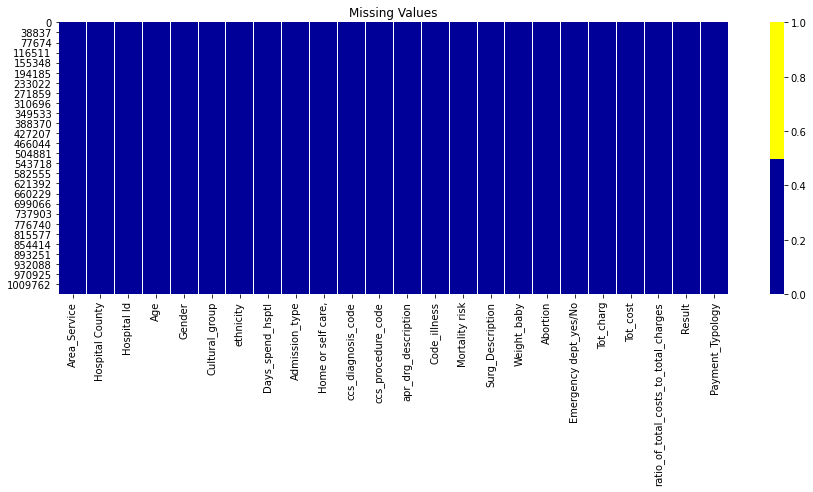

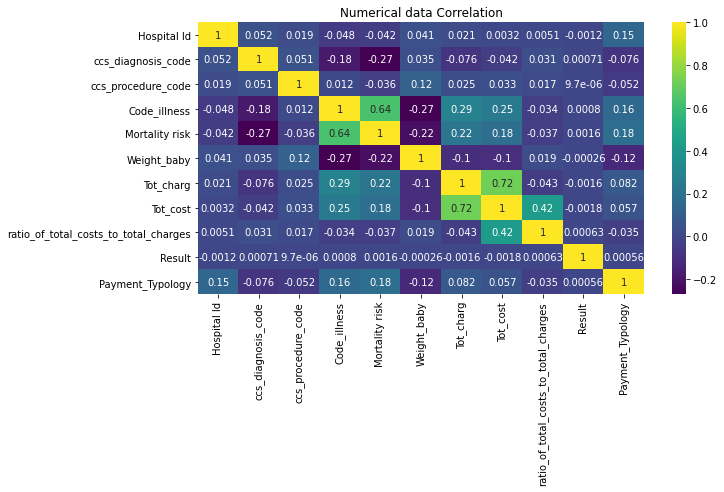

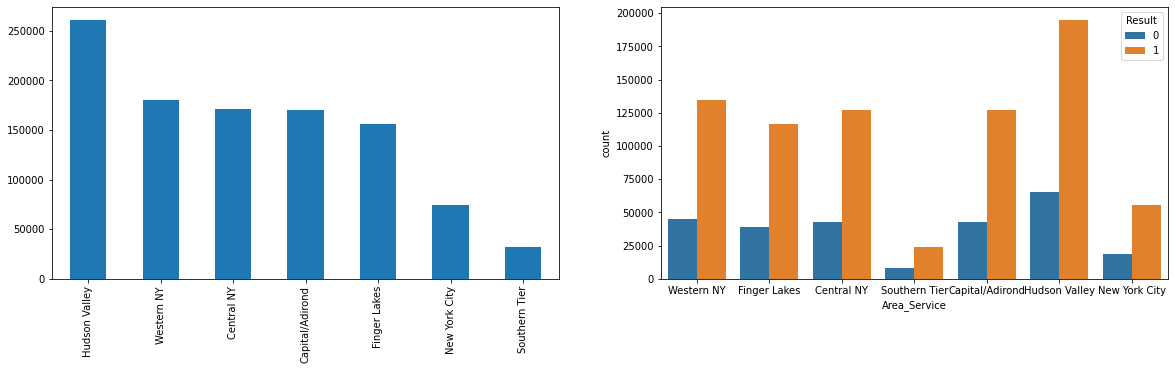

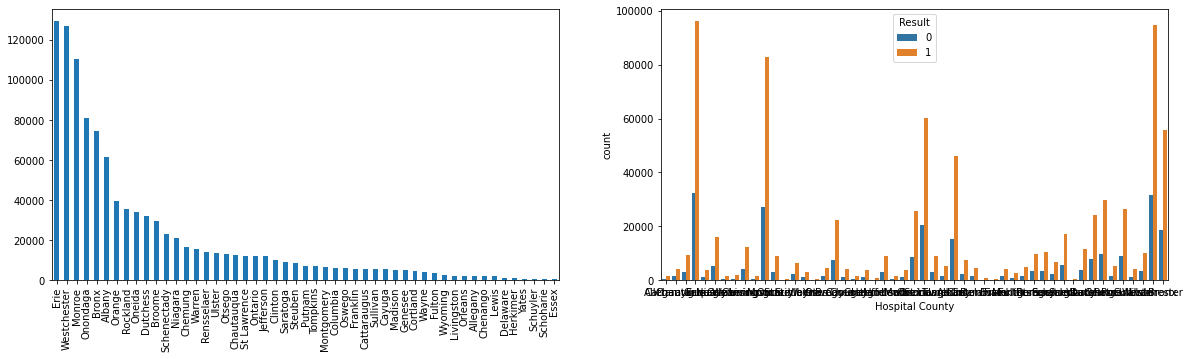

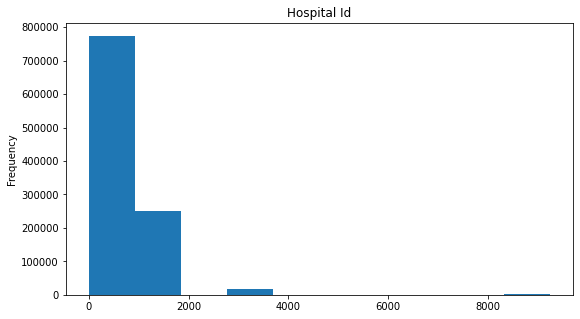

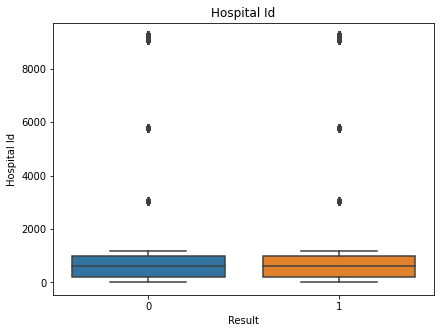

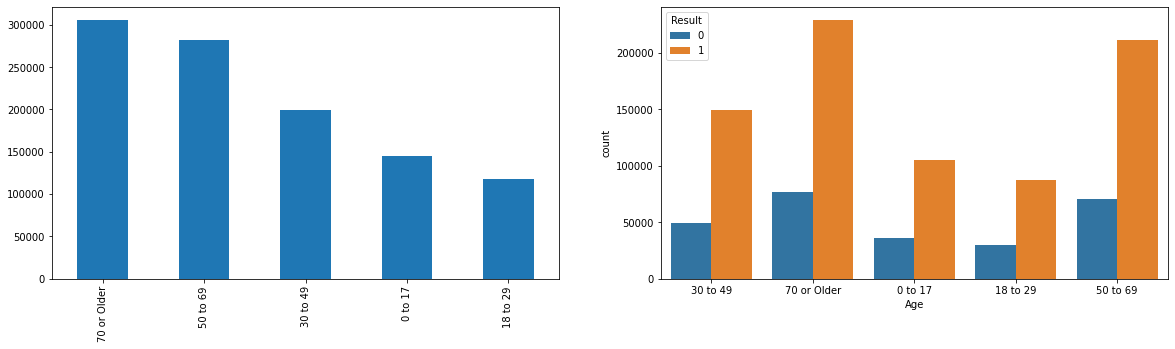

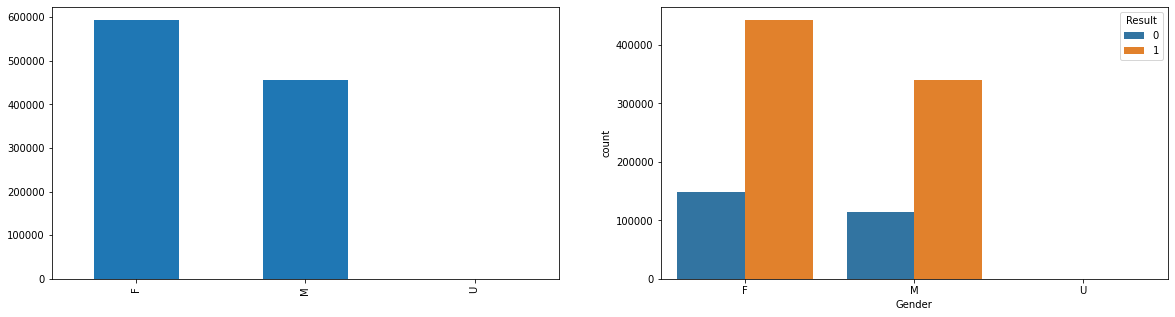

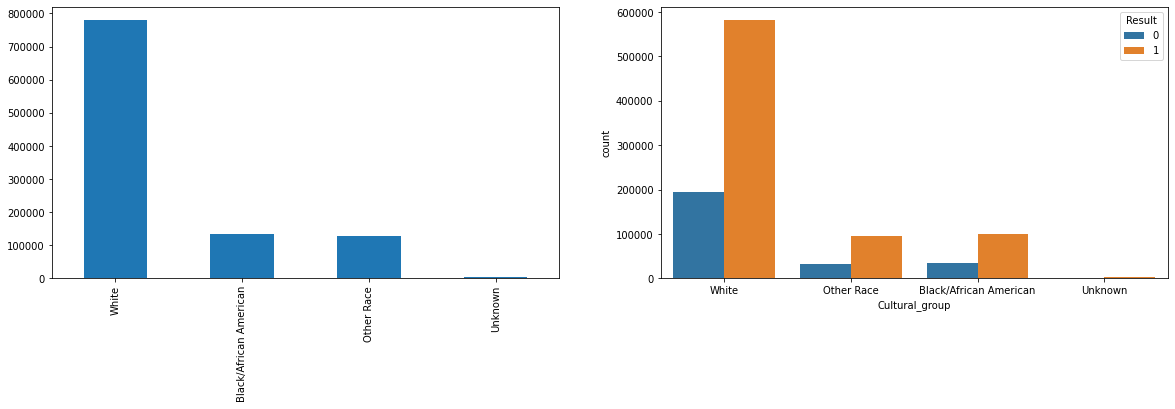

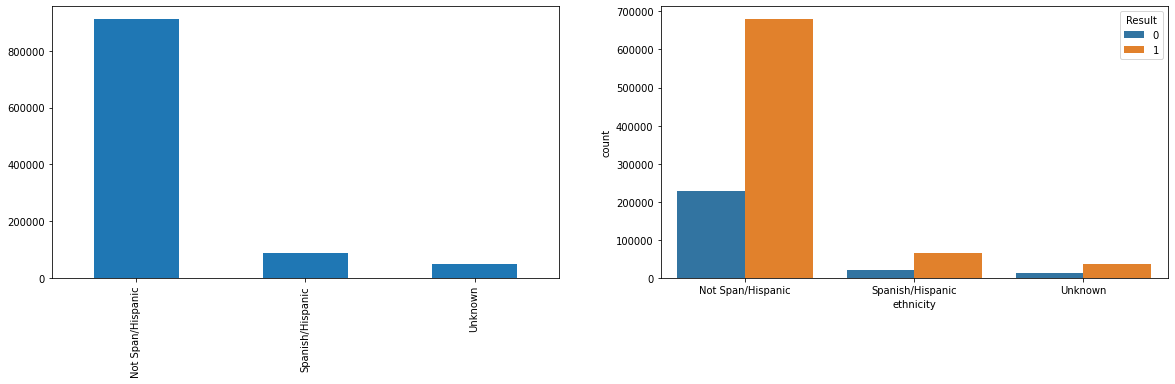

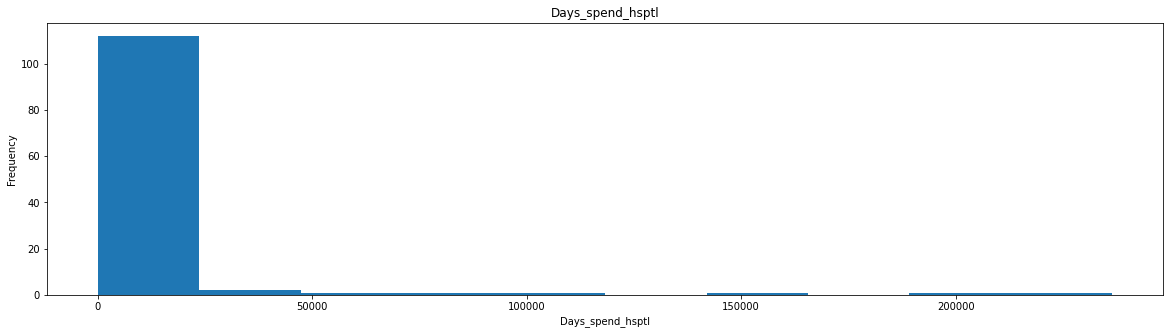

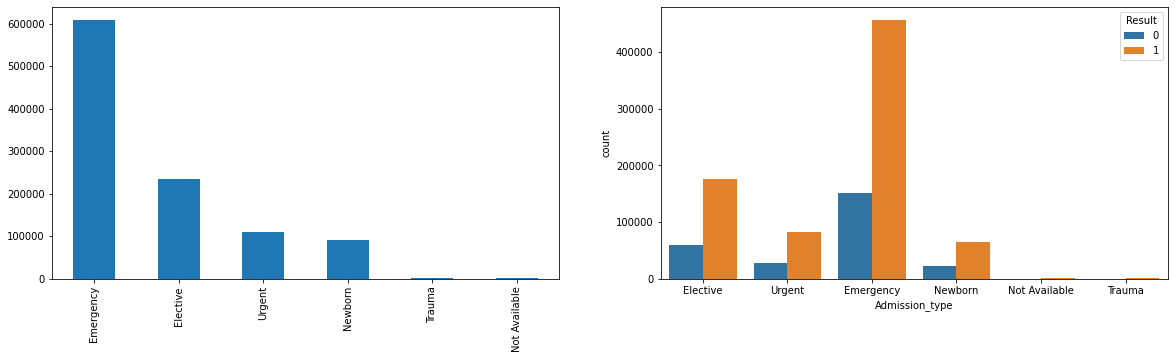

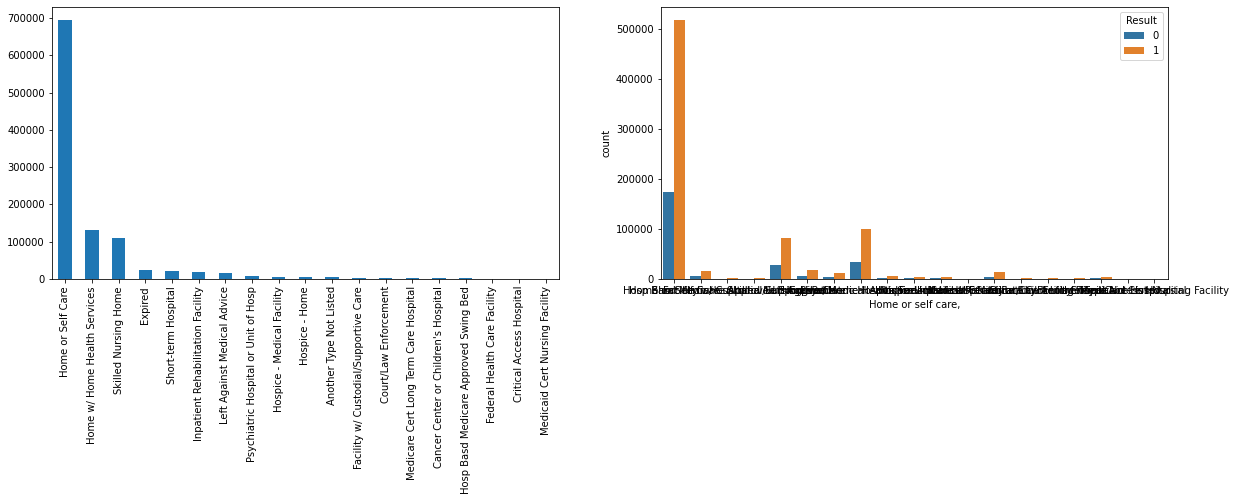

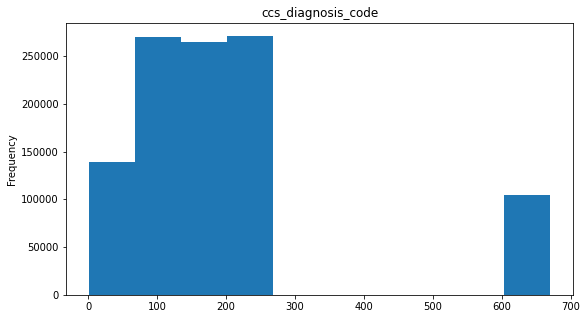

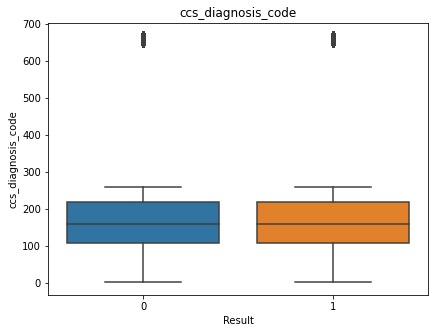

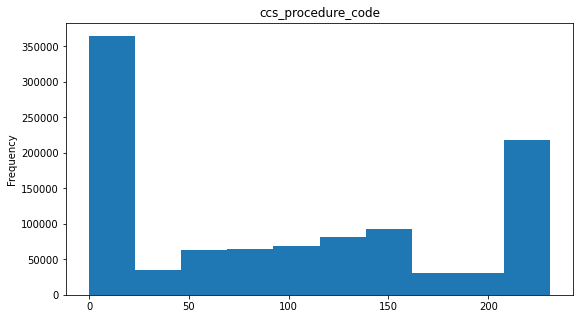

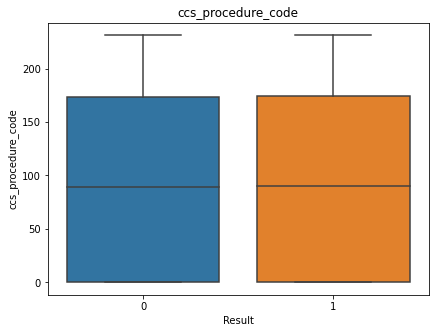

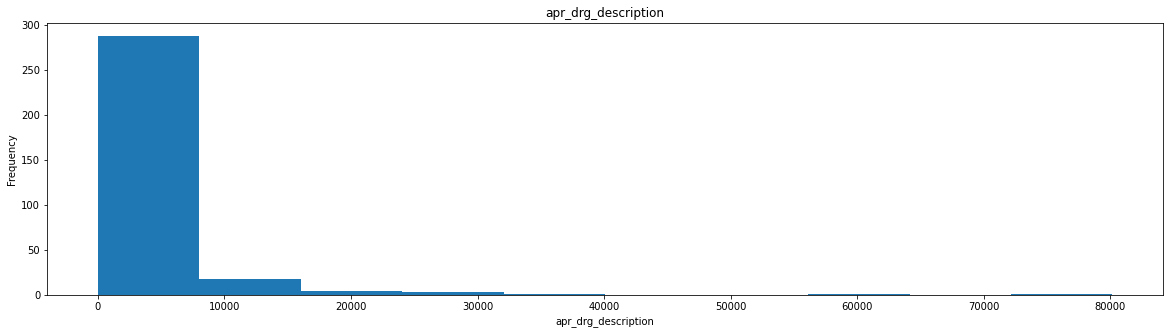

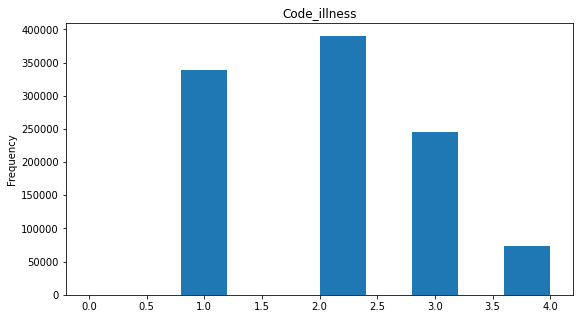

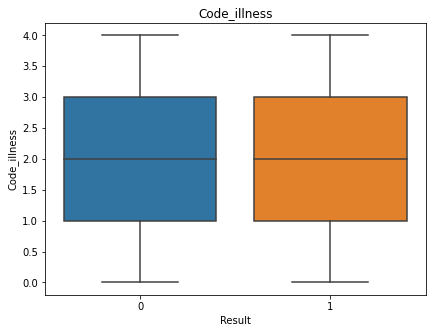

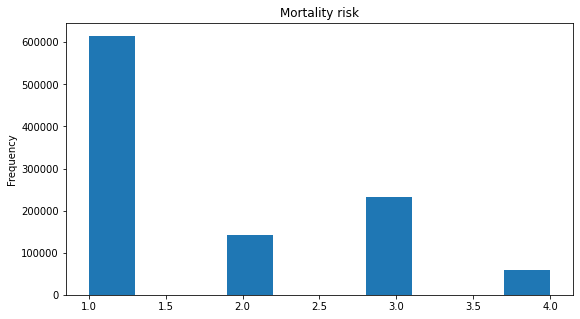

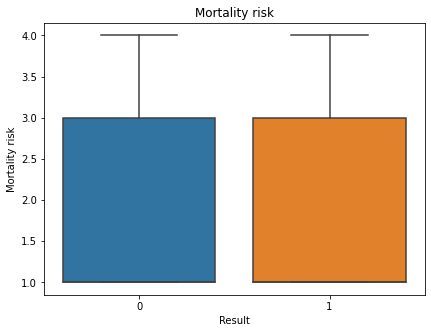

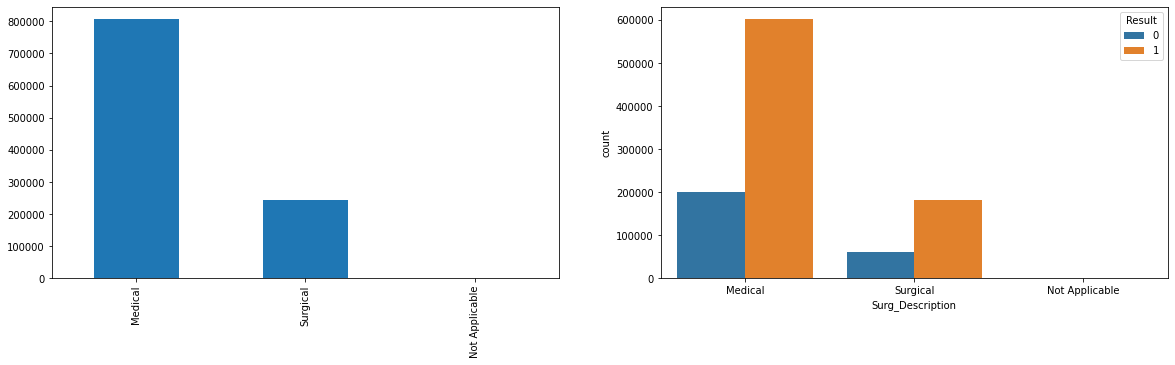

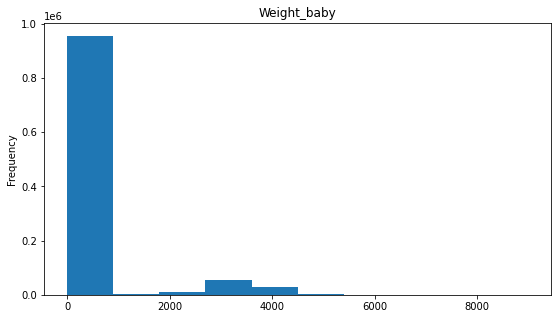

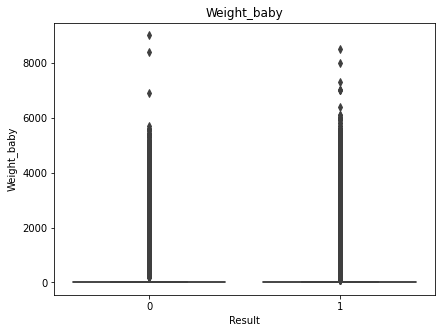

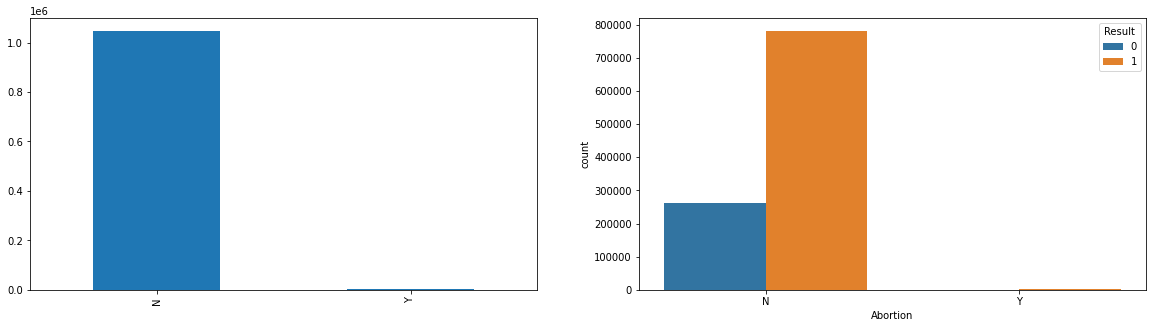

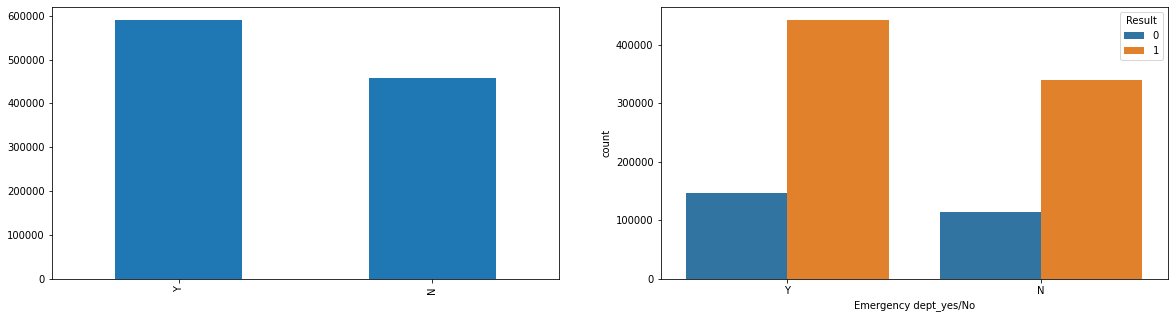

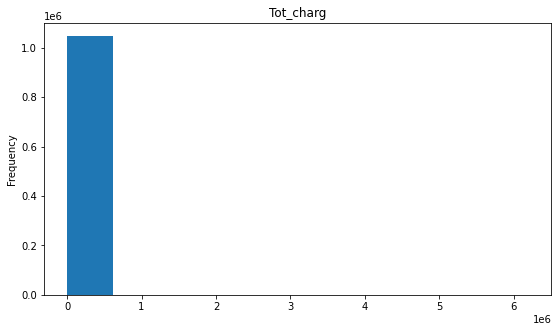

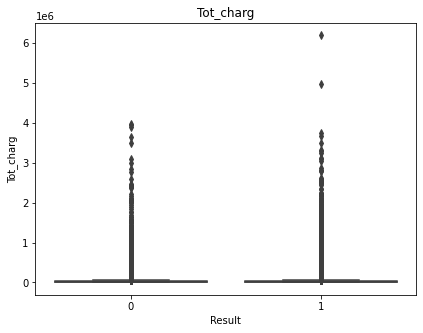

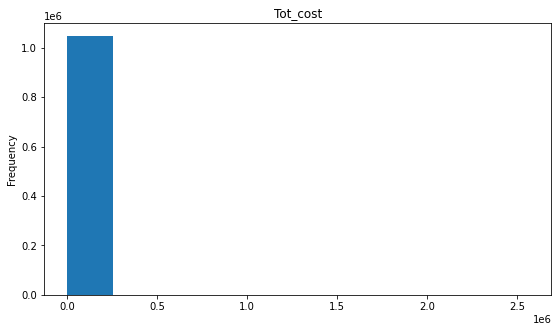

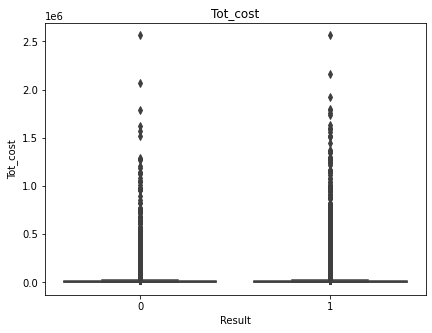

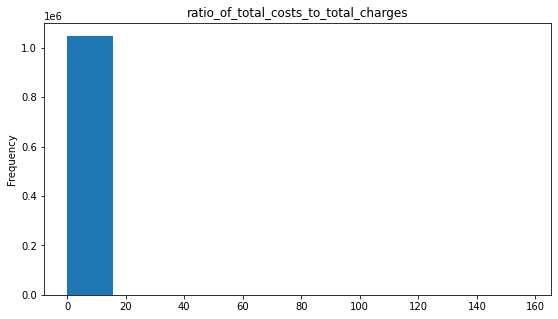

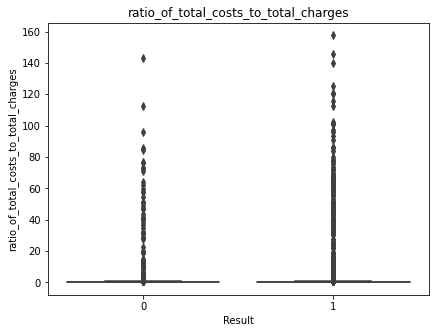

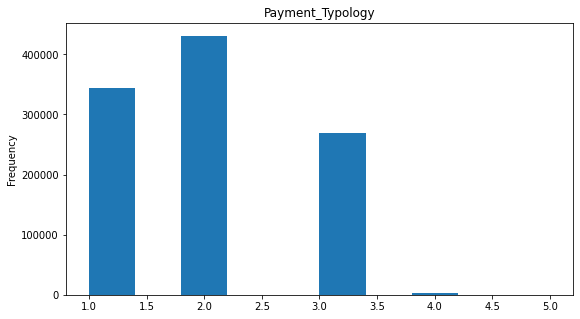

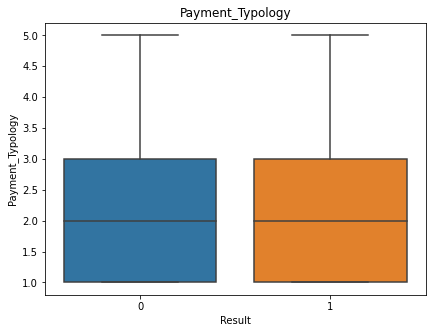

In [ ]:
try:
  obj1 =Complete_eda(data,"Result")
  obj1.analyze()
except  NameError:
    print("Please load proper dataset in pandas dataframe or check dataset name")
except KeyError:
      print("Please type correct target variable")   


####OBSERVATIONS


1. Data set is structured and has 24 columns and 1046119 rows
2. Data set is from Insurance Company in US
3. Objective is to detect fraudulent claims in dataset
4. Data set is imbalnced as per our motive 
5. Binary Classification Problem
6. Target variable is Result (Binary Class)
7. Duplicates entries are 4814 
8. %of duplicate entries: 0.459
9. Colnames need to be renamed not in format
10. Missing Values/Null Values 
    *        Area_Service   : 2455, % :0.23
    *       Hosp_County     : 2455, % :0.23
    *  Mortality_Risk       : 41    % :0
11. 5  numerical parameters
12. 18 Categorical Parameters
13. Fraudulent entries are more in high density categories  in most columns
14. Noise present in one numerical (Days_spend_hosp) and  one  categorical (Gender)
15. Abortion column Fraudulent entries are present in only  No category
































# Inferences

1. Remove Duplicates entries as it will reduce complexity in dataset.  
2. No need to handle Null entries remove it as it is very less as compare to dataset and imputation techniques will add more complexity as it require domain expertise for filling entries 
3. Data preprocessing is Required for some columns
4. Some Features need to be removed to reduce additional  variances as they are inter correlated or clustering them according to Health care standards
5. Outliers in numerical columns can be removed by Robust     scaling 
6. Need to find method to deal with imbalance dataset 

